## 10_01 탐색적 데이터 분석

#### 탐색적 데이터 분석(EDA:Exploratory Data Analysis)
* 데이터 탐색과 데이터 전처리 단계는 데이터 분석 프로세스에서 가장 많은 시간과 노력이 소모된다.   
* ML모델의 성능에는 데이터를 올바르게 파악하고 효과적으로 가공하는 것이 더 많은 영향을 미친다.
* 원천 데이터(raw data)는 수많은 오류와 이상치를 가지고 있는 경우가 많으므로, 다양한 각도에서 데이터를 탐색하고 시각화 하여 가치있는 데이터로 정제 해야 한다.

* 데이터 시각화의 궁극적 목적은 분석 결과를 커뮤니케이션 하기 위함이다.
* 보는 사람의 흥미를 유발하고 효과적으로 전달하기 위해서는 올바른 시각화 기법을 사용해야 한다.
* 데이터의 형태나 분석 목적에 따라 효과적인 표현 방식이 다양하게 분류 된다.  

* EDA를 할 때는 극단적 해석은 피해야 하며 지나친 추론이나 자의적 해석도 지양해야 한다.

#### EDA를 하는 주요 목적  
* 데이터의 형태와 척도가 분석에 맞게 되었는지 확인  
* 평균, 분산, 분포, 패턴 등의 확인을 통한 데이터 특성 파악  
* 결측값 or 이상치 파악 및 보완  
* 변수 간의 관계성 파악  
* 분석 목적과 방향성 점검 및 보정

#### 엑셀을 활용한 EDA
* 적은 데이터를 EDA 할 때는 사용자 친화적이고 효율적인 MS 엑셀이나 구글 스프레드 시트를 사용한다.  
* 누구에게나 익숙한 툴이라서 실무자나 의사결정권자와 결과물을 공유하는데도 효과적으로 쓰인다.  
* 각 데이터 샘플을 1,000개씩 단순 임의추출을 하고 데이터 명세서와 함께 변수 하나씩 눈으로 살펴본다.
* 피벗테이블을 생성해서 다양한 방식으로 확인 해본다.
* 본격적인 데이터 탐색에 앞선 보조적인 방법이다.
---
#### 나의 생각:   
필자의 생각에 공감한다. 데이터 분석에 파이썬이나 다른 툴이 인기가 많고 해서 기존에 잘 사용하던 엑셀이나 스프레드시트를 혼용하지 않을 이유가 없다.   
EDA의 목적은 데이터를 쉽고 빠르게 효율적으로 파악하고 발견한 데이터의 이슈들을 이해관계자에게 효율적이고 효과적으로 전달하는 것이라고 생각하기 때문이다.  
본질은 업무 상황, 환경, 데이터 특성에 맞는 도구를 효율적이고 효과적으로 적재적소에 잘 사용하는 것이다.

In [1]:
# 패키지 임포트

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(color_codes=True)
%matplotlib inline

In [2]:
# 데이터 불러오기 및 확인

df = pd.read_csv("/Users/adam/Data_Analytics/Python/Datasets/hotel_booking_demand/hotel_bookings.csv")

# 샘플 데이터 확인
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# 각 컬럼의 속성 및 결측치 확인

df.info()

# 결측치가 적으면 표본 제거법, 결측치가 차지하는 비율이 많으면 대치법 등으로 해결해준다.
# 중요한 것은 도메인 지식과 데이터 특성을 잘 파악해서 적절한 방법을 적용해주는 것이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# 각 컬럼의 통계치 확인

df.describe()

# arrival_date_year 컬럼은 숫자형이지만 문자형과 다름 없는 컬럼이라서 통계치가 큰 의미가 없다.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
# 각 컬럼의 왜도 확인

df.skew(numeric_only=True)

# 왜도와 첨도는 숫자형 데이터에 적용하므로 numeric_only=True 를 하면 warning 메세지가 사라진다.

is_canceled                        0.536678
lead_time                          1.346550
arrival_date_year                 -0.232583
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
adults                            18.317805
children                           4.112590
babies                            24.646545
is_repeated_guest                  5.326315
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.089386
company                            0.601600
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
dtype: float64

In [6]:
# 각 컬럼의 첨도 확인

df.kurtosis(numeric_only=True)

# 첨도 값이 높은 컬럼(예:adults, babies)의 경우 분포가 넓지 않은 데이터 이다.
# 실제로 해당 컬럼을 확인 해보면 명목형 데이터라서 첨도 값이 높다.
# 첨도 값이 이상하게 높은 경우 해당 컬럼의 데이터를 더 세부적으로 확인해보면 된다.

is_canceled                         -1.712005
lead_time                            1.696449
arrival_date_year                   -0.994564
arrival_date_week_number            -0.986077
arrival_date_day_of_month           -1.187168
stays_in_weekend_nights              7.174066
stays_in_week_nights                24.284555
adults                            1352.115116
children                            18.673692
babies                            1633.948235
is_repeated_guest                   26.370077
previous_cancellations             674.073693
previous_bookings_not_canceled     767.245210
booking_changes                     79.393605
agent                               -0.007180
company                             -0.490795
days_in_waiting_list               186.793070
adr                               1013.189851
required_car_parking_spaces         29.998056
total_of_special_requests            1.492565
dtype: float64

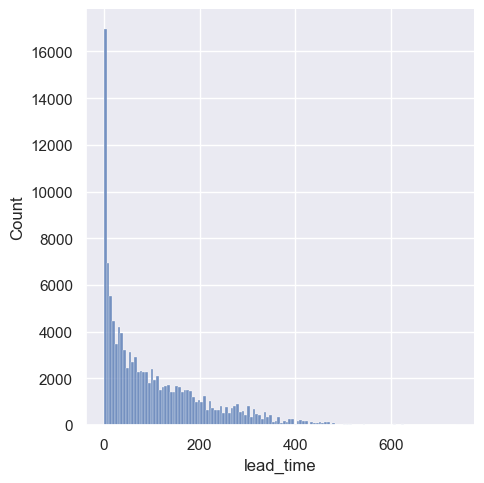

In [7]:
# 특정 변수 분포 시각화

sns.displot(df['lead_time'])

# 버전이 업데이트 되서 distplot을 하면 오류가 생성됨. displot으로 바꿔준다.

# lead_time 컬럼은 예약 날짜로부터 투숙 날짜까지의 일수 차이를 의미한다.
# 0값이 실제로 당일 예약을 의미하는 것 인지, 기록이 없는 예약 건(결측값)을 일괄적으로 0 값 처리한 것인지 확인할 필요가 있다.

/var/folders/7r/wgftjkfx18j59k9jdyw6892c0000gn/T/ipykernel_13179/736337124.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="hotel", y="lead_time", data=df, palette='deep', size=1)


<Axes: xlabel='hotel', ylabel='lead_time'>

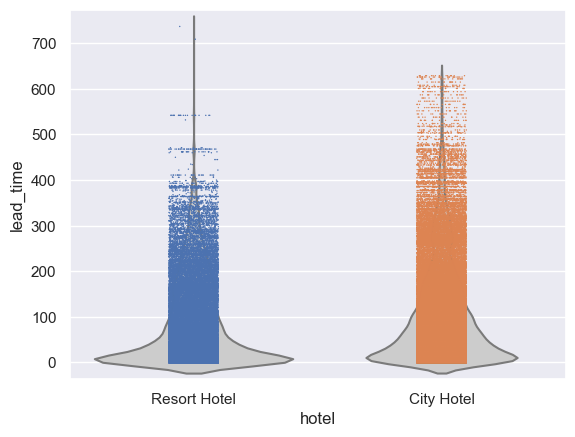

In [8]:
# 그룹 구분에 따른 lead_tile 분포 차이 시각화

sns.violinplot(x="hotel", y="lead_time", data=df, inner=None, color=".8")
sns.stripplot(x="hotel", y="lead_time", data=df, palette='deep', size=1)

# 책의 stripplot 코드대로 입력하면 두 호텔 사이에 색깔 차이가 없다. 이 때 patette 옵션을 넣어주면 해결 된다.
# FutureWarning 메세지를 삭제하려면 hue 옵션을 추가해 주면 된다.